### Preparing the Dataset

In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv(r'C:\Users\Owner\Downloads\car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [17]:
selected_columns = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_selected = df[selected_columns]
df_selected.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


### EDA

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

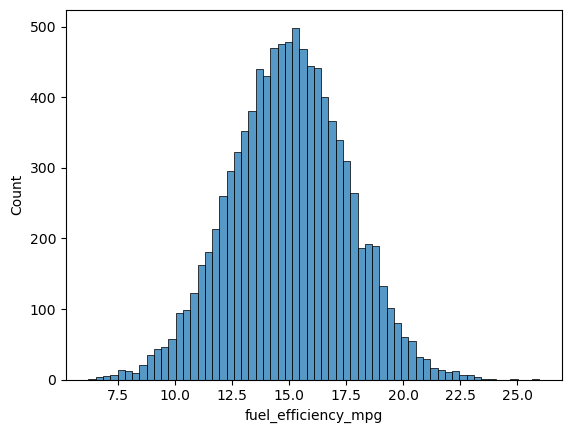

In [20]:
sns.histplot(df["fuel_efficiency_mpg"])

plt.show()
             

The shape of the graph of the **fuel_efficiency_mpg** variable is a bell (normally distributed). Hence, it does not have a long tail. 

### Question 1

In [23]:
df_selected.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

The **horsepower** column has missing vavlues.

### Question 2

In [25]:
median_horsepower=df_selected.horsepower.median()

print('The median of the horsepower is:', median_horsepower)

The median of the horsepower is: 149.0


### Prepare and split the dataset

In [39]:

n=len(df_selected)
idx=np.arange(n)

np.random.shuffle(idx)

np.random.seed(42)
idx


array([ 483, 7506, 8795, ..., 5390,  860, 7270])

In [40]:


df_selected.iloc[idx[:10]]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
4562,180,120.0,3551.398040,2013,12.145734
5885,210,118.0,3620.351977,2018,11.378399
3746,150,152.0,2524.407794,2012,16.667294
7109,160,151.0,2752.964230,2009,15.819367
2698,250,147.0,3202.856567,2020,14.100998


Split data into train/val/test sets, with 60%/20%/20% distribution


In [41]:
#Split data in train/val/test sets, with 60%/20%/20% distribution
n_val= int(0.2*n)
n_test=int(0.2*n)

n_train=n-(n_val+n_test)

In [42]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [51]:
df_train= df_selected.iloc[idx[n_train:]]
df_val= df_selected.iloc[idx[n_train:n_train+n_val]]
df_val= df_selected.iloc[idx[n_train+n_val:]]

In [52]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


### Question 3

In [60]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
6163,180,112.0,2772.134410,2020,15.366341
3313,260,138.0,3014.061530,2022,14.601182
4781,140,181.0,3652.186151,2016,12.247032
8210,270,105.0,2753.040847,2023,15.136400
6713,170,224.0,4163.375137,2003,10.340419


In [63]:
X_train=df_train.values
X_train

array([[ 180.        ,  112.        , 2772.13441008, 2020.        ,
          15.36634109],
       [ 260.        ,  138.        , 3014.06152983, 2022.        ,
          14.60118181],
       [ 140.        ,  181.        , 3652.18615117, 2016.        ,
          12.24703219],
       ...,
       [ 290.        ,  187.        , 2440.50803916, 2019.        ,
          18.40443466],
       [ 260.        ,  129.        , 1865.40447951, 2019.        ,
          20.50246014],
       [ 270.        ,  147.        , 2611.9394998 , 2017.        ,
          16.81624056]])

In [68]:
y_train=y_train = df_train["fuel_efficiency_mpg"].values
y_train

array([15.36634109, 14.60118181, 12.24703219, ..., 18.40443466,
       20.50246014, 16.81624056])

In [74]:
def train_linear_regression(X_train, y_train):
    ones = np.ones(X_train.shape[0])
    X = np.column_stack([ones, X_train])  

    XTX = X.T.dot(X)                      
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y_train)

    return w_full[0], w_full[1:]         


In [75]:
train_linear_regression(X_train,y_train)

(np.float64(nan), array([nan, nan, nan, nan, nan]))

Filling mising values with zeros

In [79]:
X_train=df_train.fillna(0)

In [82]:
train_linear_regression(X_train,y_train)

(np.float64(-3.452598207331903e-10),
 array([-9.05525654e-16, -3.64291930e-17, -8.67361738e-18, -4.80761264e-14,
         1.00000000e+00]))

In [83]:
w0,w=train_linear_regression(X_train,y_train)

In [84]:
y_pred=w0+X_train.dot(w)


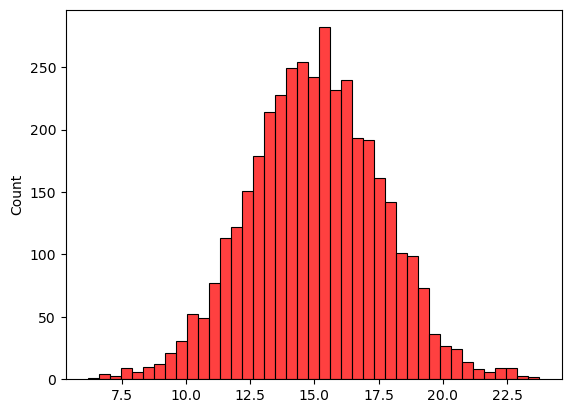

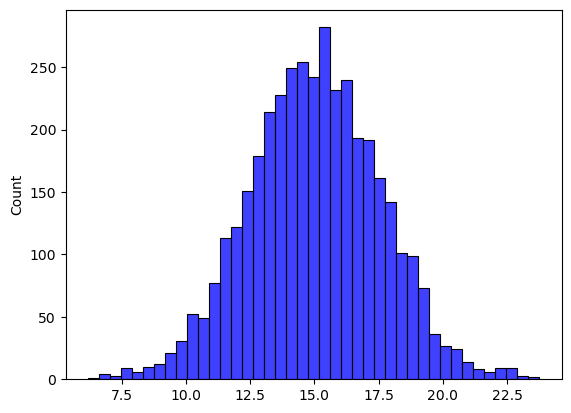

In [102]:
sns.histplot(y_pred, color='red')
plt.show()
sns.histplot(y_train, color='blue')
plt.show()

Fill missing values with the mean

In [89]:
df_train.isnull().sum()

engine_displacement      0
horsepower             279
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [142]:
fill_mean=df_train["horsepower"].mean()

In [143]:
X_train=df_train.fillna(fill_mean)

In [146]:

train_linear_regression(X_train,y_train)

(np.float64(-2.1252333226584597e-10),
 array([-1.58545052e-14, -6.66428718e-14, -6.93889390e-18,  1.01191625e-13,
         1.00000000e+00]))

In [145]:
w0,w=train_linear_regression(X_train,y_train)

In [97]:
y_pred=w0+X_train.dot(w)


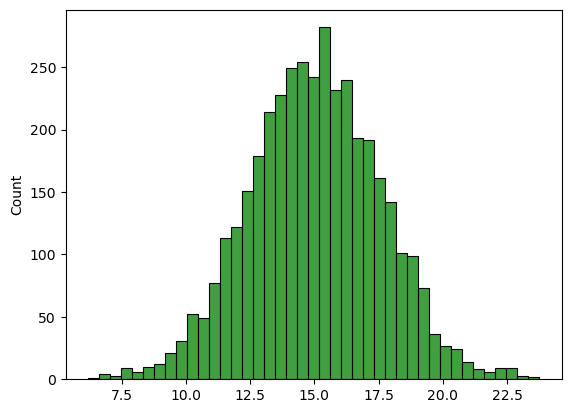

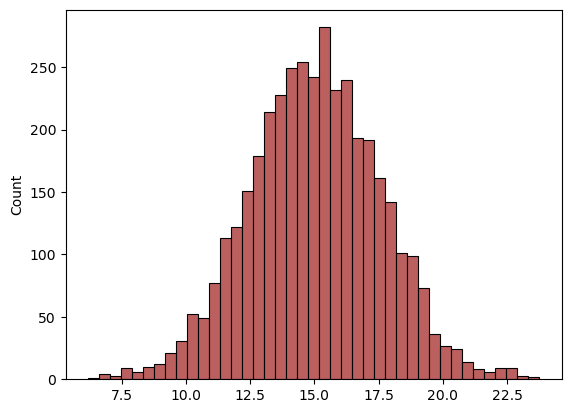

In [103]:
sns.histplot(y_pred, color='green')
plt.show()

sns.histplot(y_train, color='brown')
plt.show()

In [154]:
def rmse(y, y_pred):
    se = (y_pred - y)**2
    mse = se.mean()
    
    return np.sqrt(mse)
    

In [158]:
rmse(y_train, y_pred)# I don't know the root of this problem. The code used to run perfectly but it's giving me an error now. The value of the RMSE was around 1.1e-11

ValueError: operands could not be broadcast together with shapes (1940,) (3880,) 

In [151]:
def prepare_X(df):
    df_num=df[selected_columns]
    df_num= df_num.fillna(0)
    X=df_num.values
    return X


In [160]:
X_train=prepare_X(df_train)
w0,w=train_linear_regression(X_train,y_train)

X_val=prepare_X(df_val)
y_pred=w0+X_val.dot(w)

y_val = df_val["fuel_efficiency_mpg"].values

rmse_val=rmse(y_val,y_pred)
round(rmse_val,2)



np.float64(0.0)